In [3]:
#### Preamble ####
# Purpose: Explore some potential relationships among the variables of the dataset
# Author: Jiazhou(Justin) Bi and Weiyang Li
# Date: 7 October 2024
# Contact: justin.bi@mail.utoronto.ca or weiyang.li@mail.utoronto.ca
# License: MIT
# Pre-requisites: python 3.10.5 or above, with pandas, numpy, matplotlib, and sklearn installed for python
# Any other information needed? None

# Loading the Dataset and Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../data/02-analysis_data/cleaned_data.csv')
df.head()

,STATEICP,GQ,OWNERSHP,MORTGAGE,SEX,AGE,MARST,EDUC,SCHLTYPE,OCC2010,INCTOT,VETSTAT
0,41,3,0,0,2,85,5,7,1,9920,18800,1
1,41,3,0,0,1,51,5,6,1,5620,12500,1
2,41,3,0,0,2,36,6,2,1,8800,16400,1
3,41,4,0,0,1,74,6,0,1,9920,8600,1
4,41,3,0,0,1,49,4,7,1,6230,5000,2


# Total Income Distribution

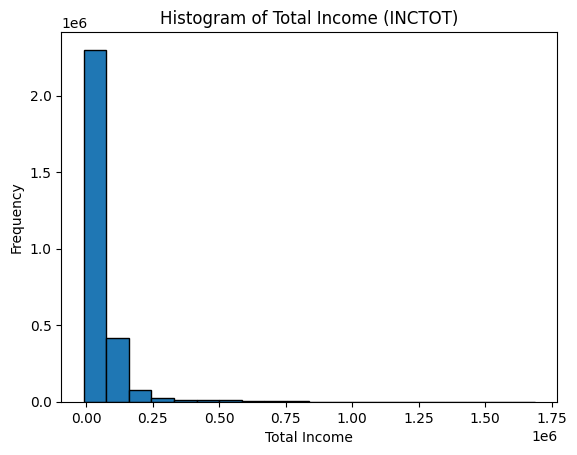

In [20]:
plt.hist(df['INCTOT'], bins=20, edgecolor='black')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Histogram of Total Income (INCTOT)')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x157c53b20>,
 'caps': [<matplotlib.lines.Line2D at 0x157c800a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x157c53880>],
 'medians': [<matplotlib.lines.Line2D at 0x157c805e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x157c80880>],
 'means': []}

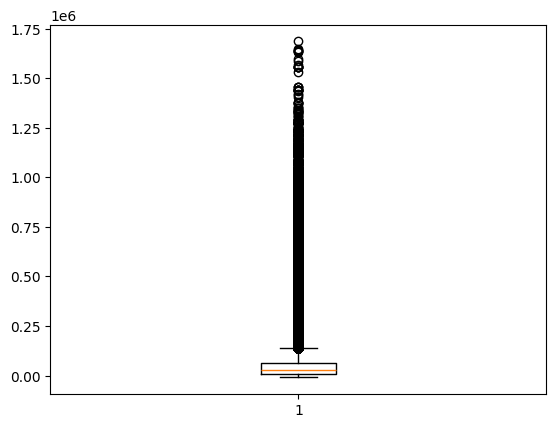

In [21]:
plt.boxplot(df['INCTOT'])

In [22]:
upper_outliers_INCTOT = df[df['INCTOT'] >= 1000000]
upper_outliers_INCTOT

,STATEICP,GQ,OWNERSHP,MORTGAGE,SEX,AGE,MARST,EDUC,SCHLTYPE,OCC2010,INCTOT,VETSTAT
39653,41,1,1,1,1,71,1,10,1,10,1084000,1
65053,61,1,1,1,1,73,1,11,1,120,1071000,1
79330,61,1,2,0,1,51,1,11,1,10,1003000,1
85440,61,1,1,3,1,77,1,11,1,3060,1167800,2
91726,61,1,1,3,1,54,1,10,1,4920,1033000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2773304,73,1,1,1,1,67,1,8,1,10,1030500,1
2775227,73,1,1,3,1,43,1,11,1,3060,1018000,1
2775793,73,1,1,3,1,71,1,11,1,20,1077600,1
2777363,73,1,1,3,1,52,1,10,1,430,1018000,1


In [23]:
mean_INCTOT = df['INCTOT'].mean()
mean_INCTOT

49422.73825908559